In [45]:
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow


In [46]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [47]:
stock_symbol = 'AAPL'
stock_data = yf.download(stock_symbol, start='2010-01-01', end='2023-06-19')
stock_data = stock_data[['Close']]

[*********************100%%**********************]  1 of 1 completed


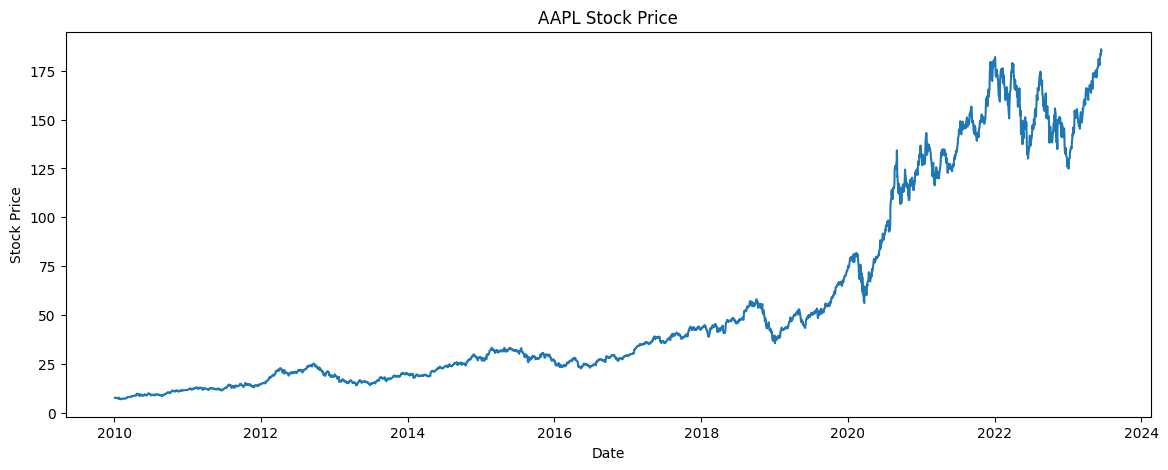

In [48]:
plt.figure(figsize=(14, 5))
plt.plot(stock_data['Close'])
plt.title(f'{stock_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


In [67]:
data = stock_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, Y = create_dataset(scaled_data, time_step)

In [74]:
training_size = int(len(X) * 0.8)
test_size = len(X) - training_size
X_train, X_test = X[0:training_size], X[training_size:len(X)]
Y_train, Y_test = Y[0:training_size], Y[training_size:len(Y)]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [72]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
model.fit(X_train, Y_train, batch_size=1, epochs=1)

2628/2628 ━━━━━━━━━━━━━━━━━━━━ 107s 39ms/step - loss: 7.5768e-04


In [53]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


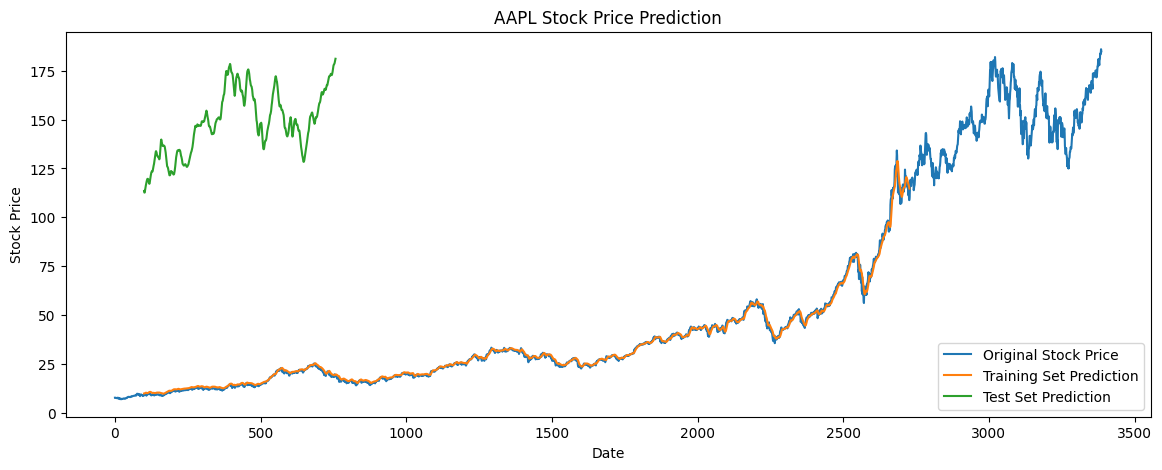

In [76]:
look_back = time_step
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[look_back:len(test_predict)+look_back, :] = test_predict

plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Stock Price')
plt.plot(train_predict_plot, label='Training Set Prediction')
plt.plot(test_predict_plot, label='Test Set Prediction')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

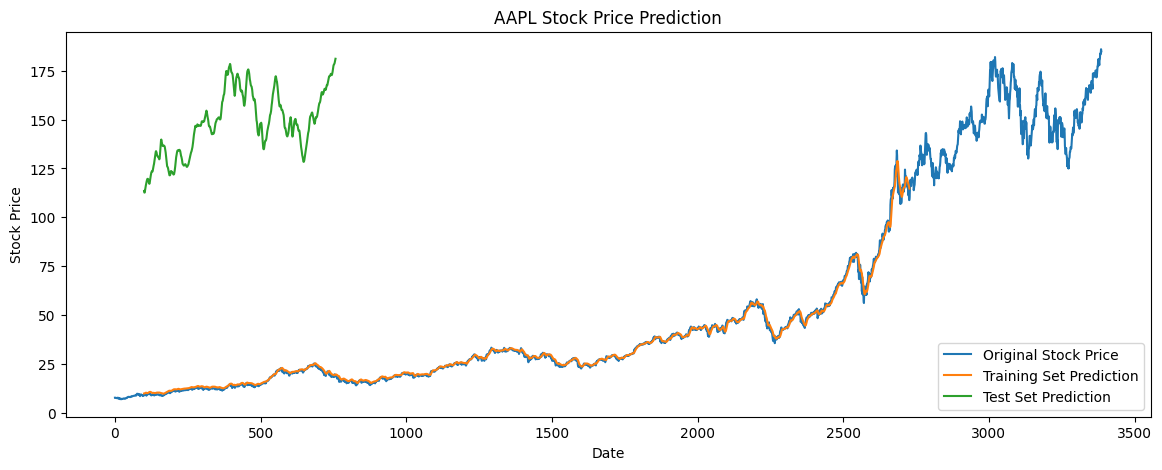

In [77]:
# Correcting the plotting part
look_back = time_step

# Prepare empty arrays with NaNs
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan

# Fill in the predictions
train_predict_plot[look_back:len(train_predict) + look_back] = train_predict
test_predict_plot[look_back:len(test_predict)+ look_back] = test_predict

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Stock Price')
plt.plot(train_predict_plot, label='Training Set Prediction')
plt.plot(test_predict_plot, label='Test Set Prediction')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()